In [1]:
# PyTorch modules
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

from torchvision.io import read_image

from torch.utils.data import DataLoader

# Standard Python modules
import matplotlib.pyplot as plt
import os
import pandas as pd

# Loading a dataset

In [2]:
training_data = datasets.FashionMNIST(
    root='data',              # path where data stored
    train=True,               # train/test dataset
    download=True,            # downloads data from internet
    transform=ToTensor()      # feature and label transformations
)

testing_data = datasets.FashionMNIST(
    root='data',              # path where data stored
    train=False,               # train/test dataset
    download=True,            # downloads data from internet
    transform=ToTensor()      # feature and label transformations
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11150105.16it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 171196.67it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3294669.21it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18023603.50it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Visualise dataset

In [3]:
def visualise_labels_dataset(data, labels, shape, colormap):
  """
  Add a docstring (RST style)
  """

  figure = plt.figure(figsize=(8,8))
  rows, cols = shape[0], shape[1]

  for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap=colormap)

  plt.show()

In [4]:
#   List all labels of dataset
label_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

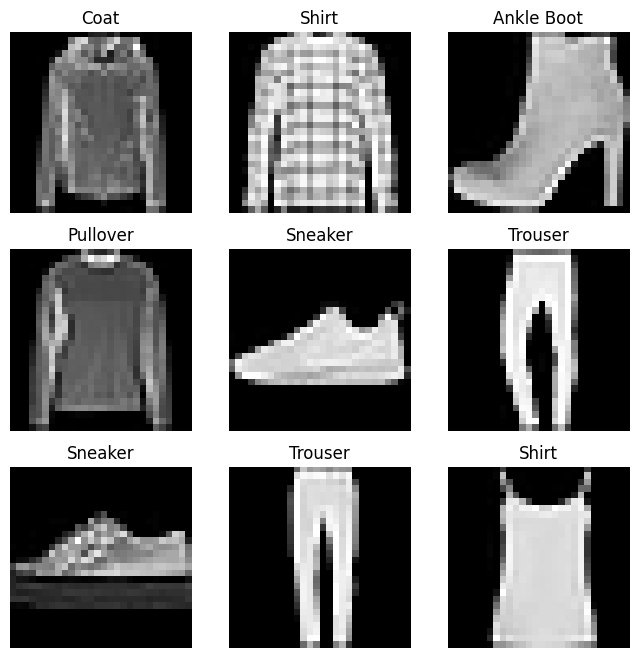

In [5]:
visualise_labels_dataset(
    data=training_data,
    labels=label_map,
    shape=[3,3],
    colormap='gray')

Dataset class has three functions: __init__, __len__, and __getitem__.

__init__:
- Creates an instance of the Dataset object.
- Initialises a directory containing images, annotations (or label) file, and the necessary transforms (come back to transforms).

__len__:
- Returns the number of samples in dataset.

__getitem__:
- Loads and returns sample from dataset at specified index idx.
- Identifies image's location on disk and converts to a tensor.
- Retrieves corresponding image label from csv data.
- Calls transform functions (why??).
- Returns tensor image and corresponding label.

In [6]:
class CustomImageDataset(Dataset):

  def __init__(self, annotations_file, img_dir,
               transform=None, target_transform=None):
    """
    """
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    """
    """
    return len(self.img_labels)

  def __getitem__(self, idx):
    """
    """
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)

    return image, label

# Data Loader

DataLoader provides us the ability to load a dataset and iterate through the samples as needed.

In [7]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=64, shuffle=True)

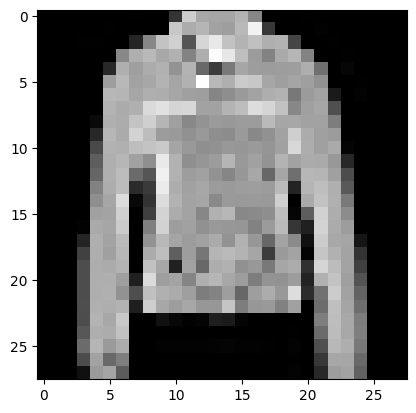

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Label: 4


In [8]:
#   Display an image from dataset and its corresponding label
train_features, train_labels = next(iter(train_dataloader))

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()

print("Feature batch shape: {}".format(train_features.size()))
print("Labels batch shape: {}".format(train_labels.size()))
print('Label: {}'.format(label))